In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(desc(Measurement.date)).limit(1).all()[0][0]


'2017-08-23'

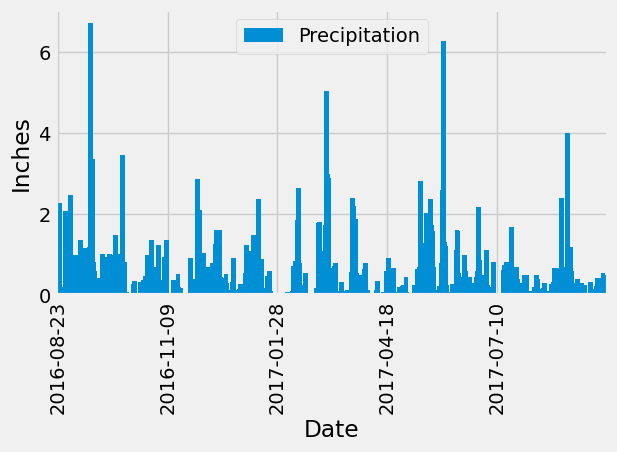

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_DF = pd.read_sql(last_year.statement, engine)
last_year_DF = last_year_DF.rename(columns={'date':'Date', 'prcp': 'Precipitation'})

# Sort the dataframe by date
last_year_DF = last_year_DF.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
last_year_DF.plot(kind='bar', xlabel='Date', ylabel='Inches', width=20)
x_ticks = np.arange(0,len(last_year_DF['Date']),445)
plt.xticks(x_ticks,['2016-08-23','2016-11-09','2017-01-28','2017-04-18','2017-07-10'], rotation=90)
plt.tight_layout()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_DF.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
len(session.query(Station.station).all())

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Station.station, func.count(Measurement.station)).filter(Measurement.station == Station.station)\
                                    .group_by(Station.station)\
                                    .order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                                        .filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

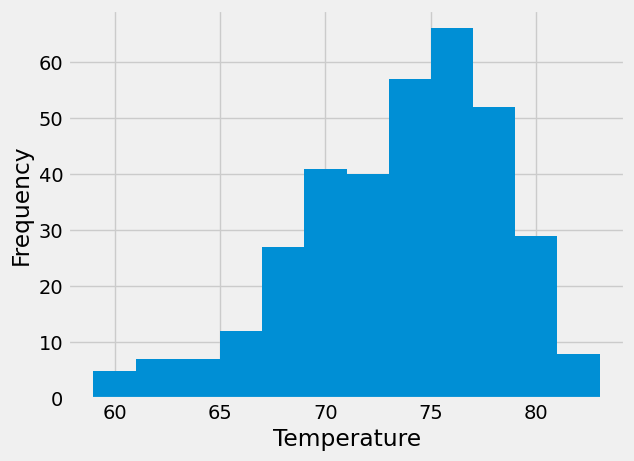

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_active = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')\
                                                    .filter(Measurement.date > year_ago).all()
counts, bins = np.histogram(last_year_active, bins=12)
plt.stairs(counts, bins, fill=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [16]:
# Close Session
#session.close()